# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US. 

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this link: [https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/Er0nVreXmihEmtMz5qC5kVIB81-ugSusExPYdcyQTglfLg?e=bNO312]. Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following link: [https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ]. 

# Step 1: Problem formulation and data collection

### 1. Determine if and why ML is an appropriate solution to deploy.

The business goal of the travel booking website is to improve customer experience while booking the domestic flight to or from the busiest airport in the US by predicting delayed flights due to weather. 

The selected data will be records of every flights during the period of five years (2014 - 2018) that could be considered as a moderately large dataset. The business problem might involves different variables such as duration of flight, arrival and departure time, arrival and departure airport, flight distance, airplanes, daily weather data, ect. These variable might have complex patterns that are difficult to be analysed by using traditional statistical methods. Therefore, it's necessary to have a powerful tool to digest the available data, recognize the complex pattern, make accurate predictions. In addition, the flight and weather parameters are continue changing, which require a model that can update the change. 

Machine learning is an appropriate solution that satify the above requirements. Using machine learning to predict flight delays due to weather will benefits the enterprise and their customers by providing robust data processing tools to work with large dataset, efficient predicting algorithms, and high adaptibility to the changing of data.

### 2. Formulate the business problem, success metrics, and desired ML output.

The main business problem is to predict domestic flight delays due to weather across top busiest airports in the USA. This will help to reduce the costs of fight delays on customers and airline companies. With the flight delays forecast, the airline companies can optimize their operation to improve customer satisfaction, thus the passengers could be well-prepared for their travels.

As a classification task, success metrics to be measured for the machine learning model's performance includes accuracy, precision, recall, specificity, area under the curve (AUC).

The prediction of delayed flights is categorised as binary classification task where the desired machine learning outputs are "0" for "no delayed" and "1" for "delayed". The expectation of this project is to understand the data, develop a ML model to predict a fight is delay or not based on known information, visualize the predicted results, evaluate the performance and deploy the model.

### 3. Identify the type of ML problem you’re dealing with.

The type of machine learning problem we are dealing with in this scenario is a binary classification problem. We aim to classify flights into two categories: those that will be delayed due to weather (class "1") and those that will not be delayed (class "0"). The model will make predictions based on historical data, including flight schedules, airline information, and weather conditions. Additionally, time series analysis may be applied to capture temporal aspects of weather conditions.

### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

In [1]:
import os
from pathlib2 import Path
from zipfile import ZipFile
import time

import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features? 

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

In [2]:
# Path to the zip files
zip_path = os.path.join(os.getcwd(),"data_compressed")   
# The folder that contains the whole project (data and code)
base_path = 'final'
# Path contains the zip files extracted                                        
csv_base_path = os.path.join(os.getcwd(),"data_extract")    
# Create a folder to contains the zip files extracted
!mkdir -p {csv_base_path}

In [3]:
# How many zip files do we have? write a code to answer it.

# Initialize a count
count = 0

# Iterate through files in the folder
for name in os.listdir(zip_path):
    if name.endswith('.zip'):
        count += 1
        
# Print the count
print(f"There are {count} zip files in the 'data_compressed' folder.")

There are 60 zip files in the 'data_compressed' folder.


#### Extract CSV files from ZIP files

In [4]:
def zip2csv(zipFile_name , file_path):
    """
    Extract csv from zip files
    zipFile_name: name of the zip file
    file_path : name of the folder to store csv
    """

    try:
        with ZipFile(zipFile_name, 'r') as z: 
            print(f'Extracting {zipFile_name} ') 
            z.extractall(path=file_path) 
    except:
        print(f'zip2csv failed for {zipFile_name}')


for file in os.listdir(zip_path):
    file_name = os.path.join(zip_path,file)
    zip2csv(file_name, csv_base_path)

print("Files Extracted")

Extracting /Users/tiennguyen/Documents/DSTS/final/data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip 
Extracting /Users/tiennguyen/Documents/DSTS/final/data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_3.zip 
Extracting /Users/tiennguyen/Documents/DSTS/final/data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_2.zip 
Extracting /Users/tiennguyen/Documents/DSTS/final/data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_2.zip 
Extracting /Users/tiennguyen/Documents/DSTS/final/data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_1.zip 
Extracting /Users/tiennguyen/Documents/DSTS/final/data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_3.zip 
Extracting /Users/tiennguyen/Documents/DSTS/final/data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_7.zip 
Extracting /Users/tiennguyen/Documents/DS

In [5]:
# How many csv files have we extracted? write a code to answer it.

# Initialize a count
count = 0

# Iterate through files in the folder
for name in os.listdir(csv_base_path):
    if name.endswith('.csv'):
        count += 1

# Print the count
print(f"There are {count} csv files were extracted.")

There are 60 csv files were extracted.


Before loading the CSV file, read the HTML file from the extracted folder. This HTML file includes the background and more information on the features included in the dataset.

In [6]:
# Read HTML file

from IPython.display import IFrame

IFrame(src=os.path.relpath(f"{csv_base_path}/readme.html"), width=1000, height=600)

#### Load sample CSV

In [7]:
# Load one csv file to see the data structure
df_temp = pd.read_csv(f"{csv_base_path}/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv")

**Question**: Print the row and column length in the dataset, and print the column names.

In [8]:
df_shape = df_temp.shape
print(f'Rows and columns in one csv file is {df_shape}')

Rows and columns in one csv file is (585749, 110)


**Question**: Print the first 10 rows of the dataset.  

In [9]:
df_temp.head(10)

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2018        3      9           3          1  2018-09-03                9E   
1  2018        3      9           9          7  2018-09-09                9E   
2  2018        3      9          10          1  2018-09-10                9E   
3  2018        3      9          13          4  2018-09-13                9E   
4  2018        3      9          14          5  2018-09-14                9E   
5  2018        3      9          16          7  2018-09-16                9E   
6  2018        3      9          17          1  2018-09-17                9E   
7  2018        3      9          20          4  2018-09-20                9E   
8  2018        3      9          21          5  2018-09-21                9E   
9  2018        3      9          23          7  2018-09-23                9E   

   DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline Tail_Number  ...  \
0                     20363                          9E      N908XJ  ...   
1                     20363                          9E      N315PQ  ...   
2                     20363                          9E      N582CA  ...   
3                     20363                          9E      N292PQ  ...   
4                     20363                          9E      N600LR  ...   
5                     20363                          9E      N316PQ  ...   
6                     20363                          9E      N916XJ  ...   
7                     20363                          9E      N371CA  ...   
8                     20363                          9E      N601LR  ...   
9                     20363                          9E      N906XJ  ...   

   Div4TailNum  Div5Airport  Div5AirportID  Div5AirportSeqID Div5WheelsOn  \
0          NaN          NaN            NaN               NaN          NaN   
1          NaN          NaN            NaN               NaN          NaN   
2          NaN          NaN            NaN               NaN          NaN   
3          NaN          NaN            NaN               NaN          NaN   
4          NaN          NaN            NaN               NaN          NaN   
5          NaN          NaN            NaN               NaN          NaN   
6          NaN          NaN            NaN               NaN          NaN   
7          NaN          NaN            NaN               NaN          NaN   
8          NaN          NaN            NaN               NaN          NaN   
9          NaN          NaN            NaN               NaN          NaN   

  Div5TotalGTime Div5LongestGTime  Div5WheelsOff Div5TailNum  Unnamed: 109  
0            NaN              NaN            NaN         NaN           NaN  
1            NaN              NaN            NaN         NaN           NaN  
2            NaN              NaN            NaN         NaN           NaN  
3            NaN              NaN            NaN         NaN           NaN  
4            NaN              NaN            NaN         NaN           NaN  
5            NaN              NaN            NaN         NaN           NaN  
6            NaN              NaN            NaN         NaN           NaN  
7            NaN              NaN            NaN         NaN           NaN  
8            NaN              NaN            NaN         NaN           NaN  
9            NaN              NaN            NaN         NaN           NaN  

[10 rows x 110 columns]

**Question**: Print all the columns in the dataset.

In [10]:
print(f'The column names are :')
print('#########')
for col in df_temp.columns:
    print(col)

The column names are :
#########
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn
Div1

**Question**: Print all the columns in the dataset that contain the word 'Del'. This will help you see how many columns have delay data in them.

In [11]:
# Filter columns containing 'Del'
col_has_del = [col for col in df_temp.columns if 'Del' in col]

# Print the filtered columns names
for col in col_has_del:
    print(col)

DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
DivArrDelay


**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [12]:
print("The #rows and #columns are ", df_temp.shape[0] , " and ", df_temp.shape[1])
print("The years in this dataset are: ", np.unique(df_temp["Year"]))
print("The date range for data is :" , min(df_temp["DayofMonth"]), " to ", max(df_temp["DayofMonth"]))
print("The airlines covered in this dataset are: ", list(np.unique(df_temp["Reporting_Airline"])))
print("The Origin airports covered are: ", list(np.unique(df_temp["Origin"])))
print("The Destination airports covered are: ", list(np.unique(df_temp["Dest"])))

The #rows and #columns are  585749  and  110
The years in this dataset are:  [2018]
The date range for data is : 1  to  30
The airlines covered in this dataset are:  ['9E', 'AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'G4', 'HA', 'MQ', 'NK', 'OH', 'OO', 'UA', 'WN', 'YV', 'YX']
The Origin airports covered are:  ['ABE', 'ABI', 'ABQ', 'ABR', 'ABY', 'ACK', 'ACT', 'ACV', 'ACY', 'ADK', 'ADQ', 'AEX', 'AGS', 'ALB', 'ALO', 'AMA', 'ANC', 'APN', 'ASE', 'ATL', 'ATW', 'AUS', 'AVL', 'AVP', 'AZA', 'AZO', 'BDL', 'BET', 'BFF', 'BFL', 'BGM', 'BGR', 'BHM', 'BIL', 'BIS', 'BJI', 'BKG', 'BLI', 'BLV', 'BMI', 'BNA', 'BOI', 'BOS', 'BPT', 'BQK', 'BQN', 'BRD', 'BRO', 'BRW', 'BTM', 'BTR', 'BTV', 'BUF', 'BUR', 'BWI', 'BZN', 'CAE', 'CAK', 'CDC', 'CDV', 'CGI', 'CHA', 'CHO', 'CHS', 'CID', 'CIU', 'CKB', 'CLE', 'CLL', 'CLT', 'CMH', 'CMI', 'CMX', 'CNY', 'COD', 'COS', 'COU', 'CPR', 'CRP', 'CRW', 'CSG', 'CVG', 'CWA', 'DAB', 'DAL', 'DAY', 'DBQ', 'DCA', 'DEN', 'DFW', 'DHN', 'DLH', 'DRO', 'DSM', 'DTW', 'DVL', 'EAR', 'EAU', 'ECP', 'EG

**Question**: What is the count of all the origin and destination airports?

In [13]:
counts = pd.DataFrame({'Origin':df_temp["Origin"].value_counts(), 'Destination':df_temp["Dest"].value_counts()})
counts

Origin  Destination
ABE     303          303
ABI     169          169
ABQ    2077         2076
ABR      60           60
ABY      79           79
..      ...          ...
WRG      60           60
WYS      52           52
XNA    1004         1004
YAK      60           60
YUM      96           96

[346 rows x 2 columns]

**Question**: Print the top 15 origin and destination airports based on number of flights in the dataset.

In [14]:
counts.sort_values(by="Origin",ascending=False).head(15 )

Origin  Destination
ATL   31525        31521
ORD   28257        28250
DFW   22802        22795
DEN   19807        19807
CLT   19655        19654
LAX   17875        17873
SFO   14332        14348
IAH   14210        14203
LGA   13850        13850
MSP   13349        13347
LAS   13318        13322
PHX   13126        13128
DTW   12725        12724
BOS   12223        12227
SEA   11872        11877

**Question**: Given all the information about a flight trip, can you predict if it would be delayed?

It is unsure that we can predict if a flight would be delayed by only using the information about a flight trip because the fight could be delayed by several reasons. As described in the data, common reasons for a delayed could be due to the carrier problems, weather condition, national airspace system, security-related concerns, or the late arrival of the previous flights. To make predictions, we would collect more historical data about the causation of delayed flights. For this scenario, it would be daily weather data of US from 2014 to 2018. Data preprocessing and feature engineering must be taken before building the machine learning model to ensure the data is consistent and have suitable format. In addition, we have to determine the target variable in the available dataset. After that, we might employ some classification algorithms such as logistic regression, decision trees, SVM to train and evaluate the model. If the model performance metrics does not efficiency predict the flight delays, we have to improve the model by looking for feature selection, dimension reduction, hyperparameters tuning, or data collection.

Now, assume you are traveling from San Francisco to Los Angeles on a work trip. You want to have an ideas if your flight will be delayed, given a set of features, so that you can manage your reservations in Los Angeles better. How many features from this dataset would you know before your flight?

Columns such as `DepDelay`, `ArrDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, and `DivArrDelay` contain information about a delay. But this delay could have occured at the origin or destination. If there were a sudden weather delay 10 minutes before landing, this data would not be helpful in managing your Los Angeles reservations.

So to simplify the problem statement, consider the following columns to predict an arrival delay:<br>

`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `Reporting_Airline`, `Origin`, `OriginState`, `Dest`, `DestState`, `CRSDepTime`, `DepDelayMinutes`, `DepartureDelayGroups`, `Cancelled`, `Diverted`, `Distance`, `DistanceGroup`, `ArrDelay`, `ArrDelayMinutes`, `ArrDel15`, `AirTime`

You will also filter the source and destination airports to be:
- Top airports: ATL, ORD, DFW, DEN, CLT, LAX, IAH, PHX, SFO
- Top 5 airlines: UA, OO, WN, AA, DL

This should help in reducing the size of data across the CSV files to be combined.

#### Combine all CSV files

In [15]:
# Create a function to filter the data from all csv files then combine into one single csv file
def combine_csv(csv_files, filter_cols, subset_cols, subset_vals, file_name):
    """
    Combine csv files into one Data Frame
    csv_files: list of csv file paths
    filter_cols: list of columns to filter
    subset_cols: list of columns to subset rows
    subset_vals: list of list of values to subset rows
    """
    # Create an empty dataframe
    df_filter = pd.DataFrame()

    # List of csv file paths
    files_path = []
    for file in os.listdir(csv_files):
         if file.endswith('.csv'):
             files_path.append(f"{csv_base_path}/{file}")

    # Read csv file, subset, filter, concatenate
    for csv_path in files_path:
        df = pd.read_csv(csv_path)
        df = df[filter_cols]
        df = df[(df[subset_cols[0]].isin(subset_vals[0])) & (df[subset_cols[1]].isin(subset_vals[1])) & (df[subset_cols[2]].isin(subset_vals[2]))]
        df_filter = pd.concat([df_filter, df], ignore_index=True)
    
    df_filter.to_csv(file_name, index=False)

In [16]:
#cols is the list of columns to predict Arrival Delay 
cols = ['Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate',
        'Reporting_Airline','Origin','OriginState','Dest','DestState',
        'CRSDepTime','Cancelled','Diverted','Distance','DistanceGroup',
        'ArrDelay','ArrDelayMinutes','ArrDel15','AirTime']

subset_cols = ['Origin', 'Dest', 'Reporting_Airline']

# subset_vals is a list collection of the top origin and destination airports and top 5 airlines
subset_vals = [['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['UA', 'OO', 'WN', 'AA', 'DL']]

**Note**: This will take 5-7 minutes to complete.

In [17]:
# Set start time
start = time.time()

# Define file name
combined_csv_filename = f"{base_path}combined_files.csv"

# Call the combine_csv function: csv_files = csv_base_path, filter_cols = cols, subset_cols = subset_cols, subset_vals = subset_vals, file_name = combined_csv_filename)
combine_csv(csv_base_path, cols, subset_cols, subset_vals, combined_csv_filename)

# Print the time to complete merging
print(f'csv\'s merged in {round((time.time() - start)/60,2)} minutes')

csv's merged in 5.28 minutes


#### Load dataset

Load the combined dataset.

In [18]:
data = pd.read_csv(combined_csv_filename)

Print the first 5 records.

In [19]:
data.head(5)

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2014        4     10           1          3  2014-10-01                AA   
1  2014        4     10           2          4  2014-10-02                AA   
2  2014        4     10           3          5  2014-10-03                AA   
3  2014        4     10           4          6  2014-10-04                AA   
4  2014        4     10           5          7  2014-10-05                AA   

  Origin OriginState Dest DestState  CRSDepTime  Cancelled  Diverted  \
0    DFW          TX  SFO        CA         755        0.0       0.0   
1    DFW          TX  SFO        CA         755        0.0       0.0   
2    DFW          TX  SFO        CA         755        0.0       0.0   
3    DFW          TX  SFO        CA         755        0.0       0.0   
4    DFW          TX  SFO        CA         755        0.0       0.0   

   Distance  DistanceGroup  ArrDelay  ArrDelayMinutes  ArrDel15  AirTime  
0    1464.0              6      -9.0              0.0       0.0    195.0  
1    1464.0              6      40.0             40.0       1.0    199.0  
2    1464.0              6       9.0              9.0       0.0    196.0  
3    1464.0              6     -16.0              0.0       0.0    195.0  
4    1464.0              6      -8.0              0.0       0.0    192.0

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [20]:
# to answer above questions, complete the following code
print("The #rows and #columns are ", data.shape[0] , " and ", data.shape[1])
print("There are ", len(np.unique(data["Year"])), "years are included in the dataset")
print("The years in this dataset are: ", np.unique(data["Year"]))
print("The date range for data is :" , min(data["DayofMonth"]), " to ", max(data["DayofMonth"]))
print("The airlines covered in this dataset are: ", list(np.unique(data["Reporting_Airline"])))
print("The Origin airports covered are: ", list(np.unique(data["Origin"])))
print("The Destination airports covered are: ", list(np.unique(data["Dest"])))

The #rows and #columns are  1658130  and  20
There are  5 years are included in the dataset
The years in this dataset are:  [2014 2015 2016 2017 2018]
The date range for data is : 1  to  31
The airlines covered in this dataset are:  ['AA', 'DL', 'OO', 'UA', 'WN']
The Origin airports covered are:  ['ATL', 'CLT', 'DEN', 'DFW', 'IAH', 'LAX', 'ORD', 'PHX', 'SFO']
The Destination airports covered are:  ['ATL', 'CLT', 'DEN', 'DFW', 'IAH', 'LAX', 'ORD', 'PHX', 'SFO']


Let's define our **target column : is_delay** (1 - if arrival time delayed more than 15 minutes, 0 - otherwise). Use the `rename` method to rename the column from `ArrDel15` to `is_delay`.

In [21]:
# Define target column
data.rename(columns={'ArrDel15':'is_delay'}, inplace=True)

Look for nulls across columns. You can use the `isnull()` function ([documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.isnull.html)).

In [22]:
data.isnull().sum()

Year                     0
Quarter                  0
Month                    0
DayofMonth               0
DayOfWeek                0
FlightDate               0
Reporting_Airline        0
Origin                   0
OriginState              0
Dest                     0
DestState                0
CRSDepTime               0
Cancelled                0
Diverted                 0
Distance                 0
DistanceGroup            0
ArrDelay             22540
ArrDelayMinutes      22540
is_delay             22540
AirTime              22540
dtype: int64

The arrival delay details and airtime are missing for 22540 out of 1658130 rows, which is 1.3%. You can either remove or impute these rows. The documentation does not mention anything about missing rows.
```

In [23]:
### Remove null columns
data = data[~(data['ArrDelay'].isnull()| data['ArrDelayMinutes'].isnull()|data['is_delay'].isnull()|data['AirTime'].isnull())]

Get the hour of the day in 24-hour time format from CRSDepTime.

In [24]:
# Extract hour (hh) from CRSDepTime (hhmm)
data['DepHourofDay'] = data['CRSDepTime'] // 100

## **The ML problem statement**
- Given a set of features, can you predict if a flight is going to be delayed more than 15 minutes?
- Because the target variable takes only 0/1 value, you could use a classification algorithm. 

### Data exploration

#### Check class delay vs. no delay

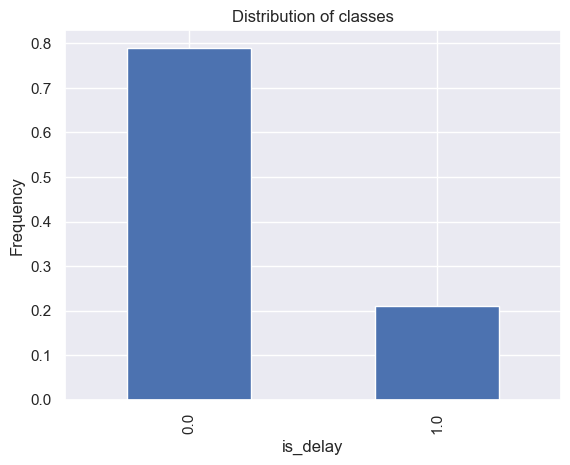

In [25]:
# Plot bar chart for the is_delay data
(data.groupby("is_delay").size()/len(data)).plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Distribution of classes')
plt.show()

**Question**: What can you deduce from the bar plot about the ratio of delay vs. no delay?

The bar plot shows an imbalance between 'delay' (class 1) and 'no delay' (class 0) in the dataset. While only 21% of the observation are 'delay', most of the flight are marked as 'no delay'. The imbalance data may have challenges in building a classification model because it might introduce bias toward 'delay' and reduce the accuracy of prediction.

**Questions**: 

- Which months have the most delays?
- What time of the day has the most delays?
- What day of the week has the most delays?
- Which airline has the most delays?
- Which origin and destination airports have the most delays?
- Is flight distance a factor in the delays?

- **June, July, August** are the months that have the most delays
- **20:00 (or 8pm)** is the time of the day that has the most delays
- **Day 1, 4, and 5** of the week have the most delays
- **WN** airline has the most delays
- **ORD** origin and **SFO** destination airports have the most delays
- Flight distance might not a factor in the delays because in the scatter plot, 'delay' and 'no delay' show similar pattern and cluster at every distance.

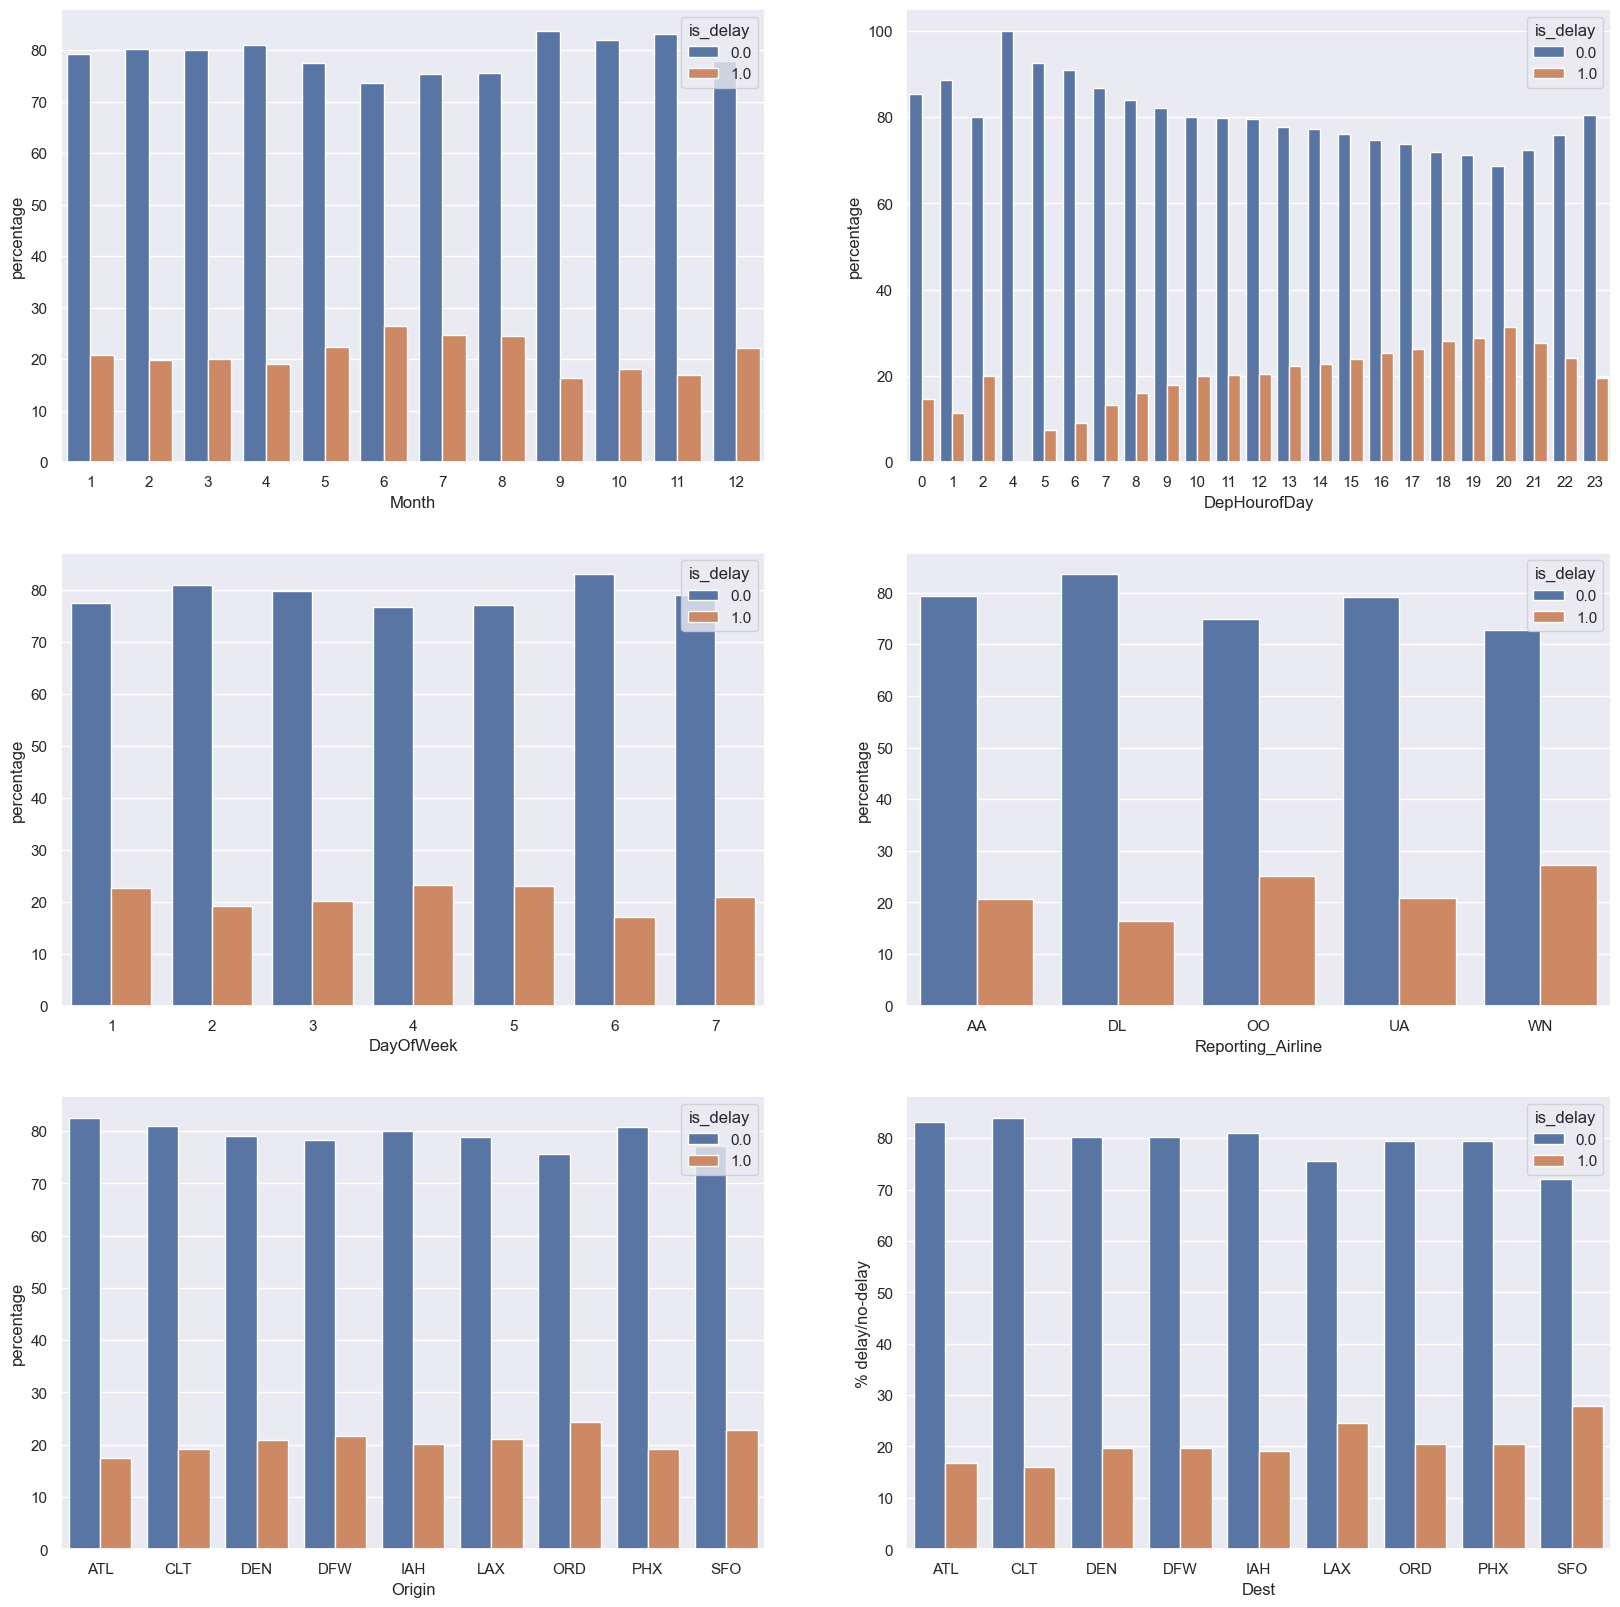

In [26]:
viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)
# fig.autofmt_xdate(rotation=90)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    temp = data.groupby(column)['is_delay'].value_counts(normalize=True).rename('percentage').\
    mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="is_delay", data=temp, ax=ax)
    plt.ylabel('% delay/no-delay')
    

plt.show()

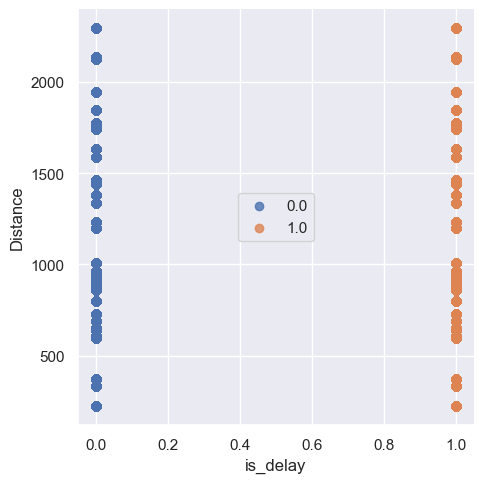

In [27]:
sns.lmplot( x="is_delay", y="Distance", data=data, fit_reg=False, hue='is_delay', legend=False)
plt.legend(loc='center')
plt.xlabel('is_delay')
plt.ylabel('Distance')
plt.show()

### Features

Look at all the columns and what their specific types are.

In [28]:
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay'],
      dtype='object')

In [29]:
data.dtypes

Year                   int64
Quarter                int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
FlightDate            object
Reporting_Airline     object
Origin                object
OriginState           object
Dest                  object
DestState             object
CRSDepTime             int64
Cancelled            float64
Diverted             float64
Distance             float64
DistanceGroup          int64
ArrDelay             float64
ArrDelayMinutes      float64
is_delay             float64
AirTime              float64
DepHourofDay           int64
dtype: object

Filtering the required columns:
- Date is redundant, because you have Year, Quarter, Month, DayofMonth, and DayOfWeek to describe the date.
- Use Origin and Dest codes instead of OriginState and DestState.
- Because you are just classifying whether the flight is delayed or not, you don't need TotalDelayMinutes, DepDelayMinutes, and ArrDelayMinutes.
- Treate DepHourofDay as a categorical variable then split in to four buckets: Night, Morning, Afternoon, Evening.

In [30]:
data_orig = data.copy()

data = data[[ 'is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay']]
categorical_columns  = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'DepHourofDay']

# Convert to categorical data
for c in categorical_columns:
    data[c] = data[c].astype('category')

# Split DepHourofDay into buckets
hour_bins = [-1, 6, 12, 18, 24]
hour_labels = ['Night', 'Morning','Afternoon','Evening']
data['DepHourofDayBucket'] = pd.cut(data['DepHourofDay'], bins=hour_bins, labels=hour_labels, include_lowest=True)

Use drop_fist = False to keep the first month, first day, first year, first quarter, ... stay in the dataset after encoding.

In [31]:
#data_dummies = pd.get_dummies(data[categorical_columns], drop_first=False, dtype='int')
data_dummies = pd.get_dummies(data.drop(columns=['DepHourofDay', 'is_delay','Distance'], axis=1), drop_first=False, dtype='int')
data = pd.concat([data, data_dummies], axis = 1)
data.drop(categorical_columns,axis=1, inplace=True)
data.drop('DepHourofDayBucket',axis=1, inplace=True)

Check the length of the dataset and the new columns.

In [32]:
data.shape

(1635590, 83)

In [33]:
data.columns

Index(['is_delay', 'Distance', 'Quarter_1', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5',
       'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11',
       'Month_12', 'DayofMonth_1', 'DayofMonth_2', 'DayofMonth_3',
       'DayofMonth_4', 'DayofMonth_5', 'DayofMonth_6', 'DayofMonth_7',
       'DayofMonth_8', 'DayofMonth_9', 'DayofMonth_10', 'DayofMonth_11',
       'DayofMonth_12', 'DayofMonth_13', 'DayofMonth_14', 'DayofMonth_15',
       'DayofMonth_16', 'DayofMonth_17', 'DayofMonth_18', 'DayofMonth_19',
       'DayofMonth_20', 'DayofMonth_21', 'DayofMonth_22', 'DayofMonth_23',
       'DayofMonth_24', 'DayofMonth_25', 'DayofMonth_26', 'DayofMonth_27',
       'DayofMonth_28', 'DayofMonth_29', 'DayofMonth_30', 'DayofMonth_31',
       'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'Reporting_Airline_AA',
       'Reporting_Airline_DL', 'Reporting_Airline_O

Before splitting the data, rename the column `is_delay` to `target`.

In [34]:
# Rename column 'is_delay' to 'target'
data.rename(columns = {'is_delay':'target'}, inplace=True )
# Convert target column to interger
data['target'] = data['target'].astype('int')

In [35]:
data.to_csv("combined_csv_v1.csv")
# note this combined file will be used in part B

# Step 3: Model training and evaluation

1. Split the data into `train_data`, and `test_data` using `sklearn.model_selection.train_test_split`.  
2. Build a logistic regression model for the data, where training data is 80%, and test data is 20%.

### Train test split

In [36]:
# Set feature and target
X = data.drop(['target'], axis=1)
y = data[['target']]

# split X and y into training and testing sets at random state = 0
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1308472, 82) (1308472, 1)
(327118, 82) (327118, 1)


### Baseline classification model

In [37]:
# Build a logistic regression model
classifier_1 = LogisticRegression()

# Fit model
classifier_1.fit(X_train, y_train)

LogisticRegression()

In [38]:
# Predict
y_pred_1 = classifier_1.predict(X_test)

## Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Percision, Recall, Sensitivity and Specificity

To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

In [39]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(test_labels, target_predicted):
    # complete the code here
    cm = confusion_matrix(test_labels, target_predicted)
    sns.heatmap(cm, annot=True, cmap='viridis', fmt='d')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [40]:
from sklearn.metrics import roc_curve, auc

def plot_roc(test_labels, target_predicted):
    # Calculate ROC
    fpr, tpr, _ = roc_curve(test_labels, target_predicted)

    # Calculate AUC
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, color='darkorange',lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0,1],[0,1], color='navy',lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

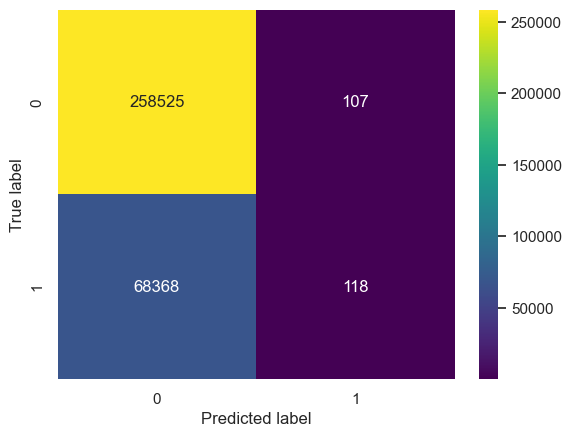

In [41]:
plot_confusion_matrix(y_test,y_pred_1)

To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

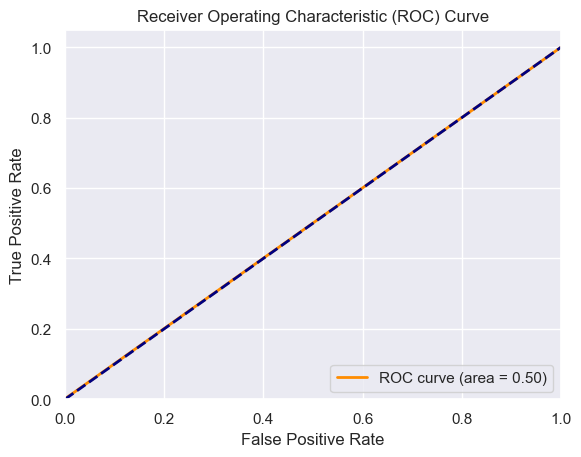

In [42]:
plot_roc(y_test,y_pred_1)

### Key questions to consider:
1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison? 

2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences? 

3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)? 

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Make predictions on the training set
y_train_pred = classifier_1.predict(X_train)

# Calculate training set performance metrics
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_score_train = f1_score(y_train, y_train_pred)

# Calculate test set performance metrics
accuracy_test = accuracy_score(y_test, y_pred_1)
precision_test = precision_score(y_test, y_pred_1)
recall_test = recall_score(y_test, y_pred_1)
f1_score_test = f1_score(y_test, y_pred_1)

# Display training set metrics. Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”.
print(f"Training Accuracy: {accuracy_train:.6f} | Testing Accuracy: {accuracy_test:.6f}")
print(f"Training Precision: {precision_train:.6f} | Testing Precision: {precision_test:.6f}")
print(f"Training Recall: {recall_train:.6f} | Testing Recall: {recall_test:.6f}")
print(f"Training F1-Score: {f1_score_train:.6f} | Testing F1-Score: {f1_score_test:.6f}")

Training Accuracy: 0.789996 | Testing Accuracy: 0.790672
Training Precision: 0.533333 | Testing Precision: 0.524444
Training Recall: 0.001776 | Testing Recall: 0.001723
Training F1-Score: 0.003539 | Testing F1-Score: 0.003435


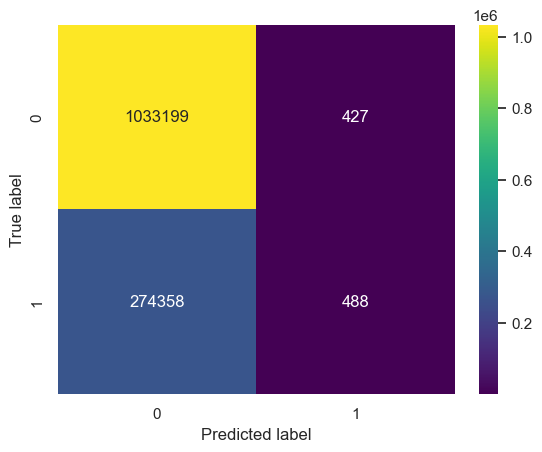

In [47]:
# Plot confusion matrix using defined function
plot_confusion_matrix(y_train,y_train_pred)


**Question**: What can you summarize from the confusion matrix?


**1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison?**

In the training set, both true negatives and true positives are significantly higher than the test set, which indicates that the model has better ability to classify instance on the training data. Summarize of the confusion matrix from testing data: 
- The True Negative value indicates that the model correctly predict 258,525 'no delayed' flights when actual label was also 'no delayed'. 
- The True Positive value indicates that the model correctly predict 118 'delayed' flights when actual label was also 'delayed'. 
- The False Negative value indicates that the model incorrectly predict 68,368 'no delayed' flight when the actual label was 'delayed'. 
- The False Positive value indicates that the model incorrectly predict 107 'delayed' flights when the actual label was 'no delayed'.

The AUC of 0.5 indicates that the models's performance is no better than random chance, which means the model did not generalize well from the training set to the test set. From this comparison, the model exhibit poor generalization (AUC of 0.5), this could be due to the imbalanced of target data which cause the model be biased towards the majority class (no delayed), resulting in poor performance on minority class (delayed). 

To improve the model's performance, we should consider to apply feature engineering, model selection, hyperparameter tunning, or gather more data variables related to the cases.

**2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences?**

The accuracy values in training and testing are similiar (0.79), which indicates that the model is consitent in making prediction. However, due to the imbalance of target variable, the accuracy values has less impact on evaluation of the classification model's performance. The high accuracy might be misleading and unreliable because of the low precision and low recall value.

The precision on testing data (0.52) is slighty lower than on the training data (0.53), which means the model tends to make more false positive errors in the testing data compared to training data.

The low recall values in training and testing (0.002) suggests that the model could not predict correctly any positive instances in training or testing data.

The F1-score in traing and testing (0.004) indicates that the model could not performing well in identifing positive instances while avoiding false positive instance.

**3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)?**

The model is ineffective in discriminate between 'delay' and 'no delay' is no better than random chance. From the business standpoints, the metrics is not sufficient for the business needs. In the next iteration, which is feature engineering section, some changes should be considered to improve the model's performance: 
- Using PCA for feature extraction
- Creating new features that provide important information related to the problem
- Scaling and normalizing the data